# Classification of CIFAR-10 data with Data Augmentation

### Step-1:

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import cifar10

from keras.utils.np_utils import to_categorical  
from keras.backend import categorical_crossentropy

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from keras.optimizers import RMSprop

from keras.preprocessing.image import ImageDataGenerator

### Step-2:

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_test is {}'.format(X_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of X_train is (50000, 32, 32, 3)
Shape of X_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


### Step-3:

In [4]:
num_classes =10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### Step-4:

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [6]:
print('Shape of one sample of X_train is {}'.format(X_train[37].shape))
print('Shape of one sample of  y_train is {}'.format(y_train[37].shape))

Shape of one sample of X_train is (32, 32, 3)
Shape of one sample of  y_train is (10,)


In [7]:
X_train[37]

array([[[0.37254903, 0.4117647 , 0.49803922],
        [0.34509805, 0.38039216, 0.47058824],
        [0.3372549 , 0.3764706 , 0.4627451 ],
        ...,
        [0.39607844, 0.45490196, 0.5647059 ],
        [0.35686275, 0.42352942, 0.53333336],
        [0.4117647 , 0.4862745 , 0.6156863 ]],

       [[0.32156864, 0.3529412 , 0.43137255],
        [0.29411766, 0.3254902 , 0.40784314],
        [0.29803923, 0.32941177, 0.40784314],
        ...,
        [0.36862746, 0.4       , 0.48235294],
        [0.2       , 0.23921569, 0.3137255 ],
        [0.32941177, 0.38039216, 0.47843137]],

       [[0.3019608 , 0.33333334, 0.40392157],
        [0.2901961 , 0.31764707, 0.38431373],
        [0.2784314 , 0.30588236, 0.37254903],
        ...,
        [0.2784314 , 0.2901961 , 0.3372549 ],
        [0.18431373, 0.20392157, 0.24705882],
        [0.34509805, 0.37254903, 0.43529412]],

       ...,

       [[0.38039216, 0.37254903, 0.28235295],
        [0.36078432, 0.36078432, 0.27058825],
        [0.38039216, 0

In [8]:
y_train[37]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Step-5:

In [9]:
model = Sequential()

model.add(Conv2D(32, (5,5), strides=(2,2), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (5,5), strides=(2,2)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

### Step-6:

In [10]:
batch_size=32

opt = RMSprop(lr=0.0005, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_data=(X_test,y_test))

C:\Users\online.CSCENTER\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
1563/1563 - 10s - loss: 1.7493 - accuracy: 0.3611 - val_loss: 1.4688 - val_accuracy: 0.4775 - 10s/epoch - 6ms/step
Epoch 2/15
1563/1563 - 9s - loss: 1.4633 - accuracy: 0.4698 - val_loss: 1.3056 - val_accuracy: 0.5303 - 9s/epoch - 6ms/step
Epoch 3/15
1563/1563 - 9s - loss: 1.3578 - accuracy: 0.5141 - val_loss: 1.2244 - val_accuracy: 0.5605 - 9s/epoch - 6ms/step
Epoch 4/15
1563/1563 - 9s - loss: 1.2870 - accuracy: 0.5400 - val_loss: 1.1707 - val_accuracy: 0.5869 - 9s/epoch - 6ms/step
Epoch 5/15
1563/1563 - 9s - loss: 1.2435 - accuracy: 0.5584 - val_loss: 1.1638 - val_accuracy: 0.5939 - 9s/epoch - 6ms/step
Epoch 6/15
1563/1563 - 9s - loss: 1.2099 - accuracy: 0.5735 - val_loss: 1.1583 - val_accuracy: 0.6008 - 9s/epoch - 6ms/step
Epoch 7/15
1563/1563 - 9s - loss: 1.1741 - accuracy: 0.5853 - val_loss: 1.3946 - val_accuracy: 0.5318 - 9s/epoch - 6ms/step
Epoch 8/15
1563/1563 - 9s - loss: 1.1533 - accuracy: 0.5945 - val_loss: 1.1534 - val_accuracy: 0.5850 - 9s/epoch - 6ms/step
Epoch 

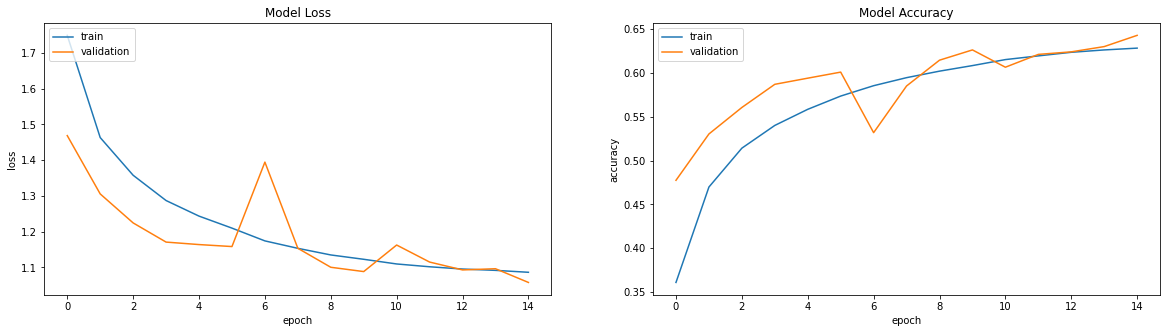

In [11]:
fig = plt.figure(figsize=(20, 5))

fig.add_subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Step-7:

In [12]:
model1 = Sequential()

model1.add(Conv2D(32, (5,5), strides=(2,2), padding='same', input_shape=X_train.shape[1:]))
model1.add(Activation('relu'))

model1.add(Conv2D(32, (5,5), strides=(2,2)))
model1.add(Activation('relu'))

model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        2432      
                                                                 
 activation_4 (Activation)   (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_5 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 3, 3, 32)          0         
                                                      

In [13]:
datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=0,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=False)

datagen.fit(X_train)

In [14]:
batch_size=32

opt = RMSprop(lr=0.0005, decay=1e-6)

model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
history1 = model1.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                                steps_per_epoch=X_train.shape[0] // batch_size,
                                epochs=15,
                                validation_data=(X_test, y_test))

Epoch 1/15


C:\Users\online.CSCENTER\AppData\Local\Temp\ipykernel_11568\1094536194.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model1.fit_generator(datagen.flow(X_train, y_train, batch_size=32),


1562/1562 [==============================] - 15s 10ms/step - loss: 1.7645 - accuracy: 0.3532 - val_loss: 1.4254 - val_accuracy: 0.4822
Epoch 2/15
1562/1562 [==============================] - 15s 10ms/step - loss: 1.5202 - accuracy: 0.4501 - val_loss: 1.3308 - val_accuracy: 0.5203
Epoch 3/15
1562/1562 [==============================] - 15s 9ms/step - loss: 1.4332 - accuracy: 0.4860 - val_loss: 1.2437 - val_accuracy: 0.5510
Epoch 4/15
1562/1562 [==============================] - 15s 9ms/step - loss: 1.3815 - accuracy: 0.5035 - val_loss: 1.1980 - val_accuracy: 0.5764
Epoch 5/15
1562/1562 [==============================] - 15s 10ms/step - loss: 1.3403 - accuracy: 0.5226 - val_loss: 1.1749 - val_accuracy: 0.5855
Epoch 6/15
1562/1562 [==============================] - 15s 10ms/step - loss: 1.3192 - accuracy: 0.5333 - val_loss: 1.1504 - val_accuracy: 0.5918
Epoch 7/15
1562/1562 [==============================] - 15s 10ms/step - loss: 1.3080 - accuracy: 0.5372 - val_loss: 1.1215 - val_accuracy

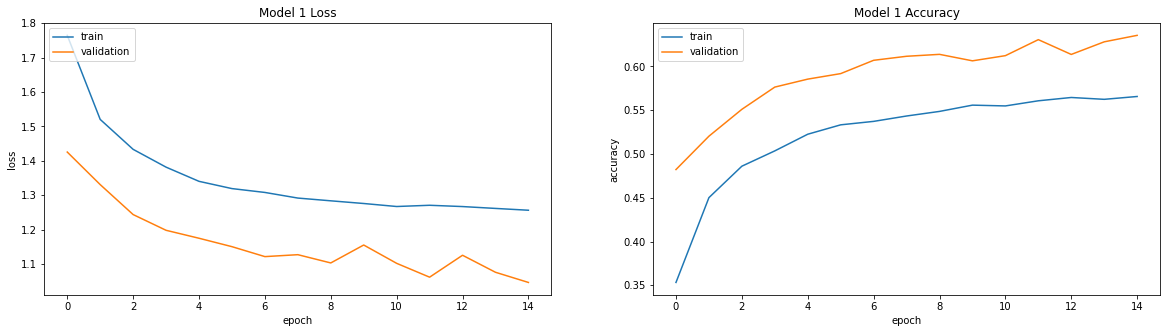

In [16]:
fig = plt.figure(figsize=(20, 5))

fig.add_subplot(1,2,1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

fig.add_subplot(1,2,2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Step-8:

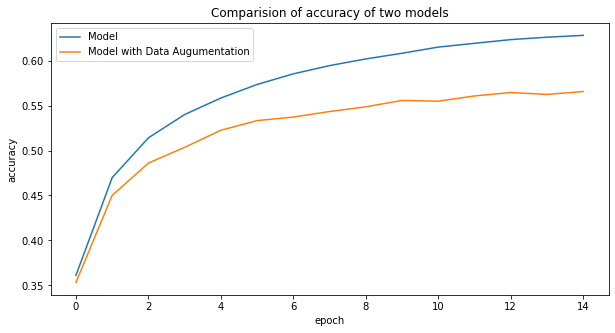

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('Comparision of accuracy of two models')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Model', 'Model with Data Augumentation'], loc='upper left')
plt.show()

1. The performance with non-augmented training is better than augmented training.


2. Yes, by tunning hyperparameters we could make the model with augmented training performs better.

### Step-9:

In [21]:
model2 = Sequential()

model2.add(Conv2D(32, (5,5), strides=(1,1), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model2.add(Conv2D(32, (5,5), strides=(1,1)))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32, (5,5), strides=(1,1), padding='same', activation='relu'))
model2.add(Conv2D(32,(5,5), strides=(1,1)))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_8 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 32)        25632     
                                                      

In [22]:
batch_size=32

opt = RMSprop(lr=0.0005, decay=1e-6)

model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history2 = model2.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                steps_per_epoch=X_train.shape[0] // batch_size,
                                epochs=15,
                                validation_data=(X_test,y_test))

Epoch 1/15


C:\Users\online.CSCENTER\AppData\Local\Temp\ipykernel_11568\2449519846.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),


1562/1562 [==============================] - 117s 75ms/step - loss: 1.6254 - accuracy: 0.4098 - val_loss: 1.3183 - val_accuracy: 0.5351
Epoch 2/15
1562/1562 [==============================] - 115s 74ms/step - loss: 1.2309 - accuracy: 0.5611 - val_loss: 1.0829 - val_accuracy: 0.6170
Epoch 3/15
1562/1562 [==============================] - 115s 73ms/step - loss: 1.0586 - accuracy: 0.6290 - val_loss: 0.9259 - val_accuracy: 0.6767
Epoch 4/15
1562/1562 [==============================] - 114s 73ms/step - loss: 0.9647 - accuracy: 0.6623 - val_loss: 0.8325 - val_accuracy: 0.7089
Epoch 5/15
1562/1562 [==============================] - 114s 73ms/step - loss: 0.9026 - accuracy: 0.6891 - val_loss: 0.8038 - val_accuracy: 0.7224
Epoch 6/15
1562/1562 [==============================] - 114s 73ms/step - loss: 0.8703 - accuracy: 0.6990 - val_loss: 0.8373 - val_accuracy: 0.7128
Epoch 7/15
1562/1562 [==============================] - 114s 73ms/step - loss: 0.8560 - accuracy: 0.7069 - val_loss: 0.8109 - val

In [ ]:
fig = plt.figure(figsize=(20, 5))

fig.add_subplot(1,2,1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

fig.add_subplot(1,2,2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()